In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
import struct
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('2D_dataset.csv')
df.head()


,x,y,group
0,18.209,18.096,1
1,17.303,15.959,1
2,19.783,21.903,1
3,18.908,16.932,1
4,19.894,18.854,1


In [8]:
df

,x,y,group
0,18.2090,18.096,1
1,17.3030,15.959,1
2,19.7830,21.903,1
3,18.9080,16.932,1
4,19.8940,18.854,1
...,...,...,...
496,8.3271,-28.583,10
497,9.4920,-26.647,10
498,12.0880,-19.010,10
499,10.3530,-26.484,10


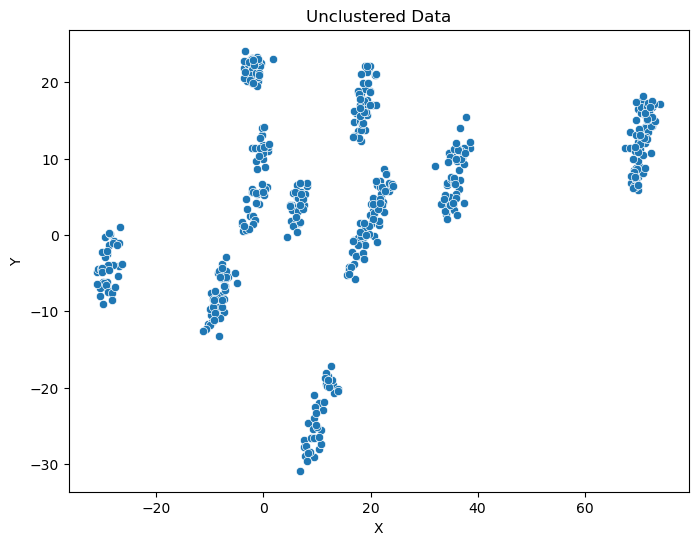

In [9]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'x', y = 'y', data = df)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unclustered Data')
plt.show()

In [10]:
data = df[['x', 'y']].values 

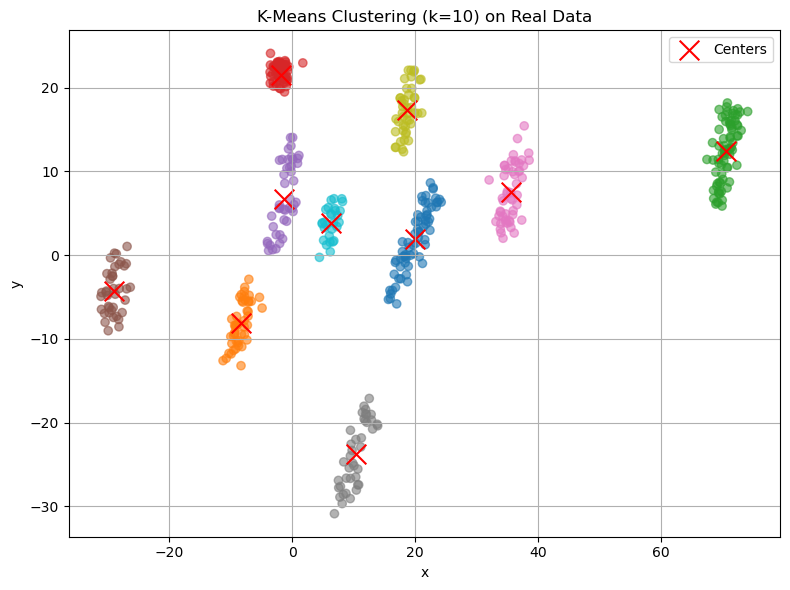

Centres détectés : [[ 20.04962687   1.8895903 ]
 [ -8.38403542  -8.15085833]
 [ 70.62982192  12.49253836]
 [ -1.88375534  21.57033846]
 [ -1.25454771   6.6813131 ]
 [-29.02433333  -4.24340769]
 [ 35.54890385   7.54838269]
 [ 10.40073171 -23.73117073]
 [ 18.68244444  17.28337778]
 [  6.33213448   3.84467172]]
Inertie : 5997.4474
Score de silhouette : 0.7416


In [13]:
def cluster_real_data_with_kmeans(data, n_clusters):
    if data.size == 0:
        print("Aucune donnée fournie.")
        return

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_

    # Plot like your synthetic function
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.legend()
    plt.title(f"K-Means Clustering (k={n_clusters}) on Real Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("Centres détectés :", centers)
    print(f"Inertie : {kmeans.inertia_:.4f}")
    if n_clusters > 1:
        silhouette = silhouette_score(data, labels)
        print(f"Score de silhouette : {silhouette:.4f}")

# --- Call the function like your generate_gaussian_clusters() ---
n_clusters = 10  # Or use best_k from silhouette analysis
cluster_real_data_with_kmeans(data, n_clusters)

## K-means


Centres trouvés par K-Means :
[[ 20.04962687   1.8895903 ]
 [ -8.38403542  -8.15085833]
 [ 70.62982192  12.49253836]
 [ -1.88375534  21.57033846]
 [ -1.25454771   6.6813131 ]
 [-29.02433333  -4.24340769]
 [ 35.54890385   7.54838269]
 [ 10.40073171 -23.73117073]
 [ 18.68244444  17.28337778]
 [  6.33213448   3.84467172]]

Inertie (somme des distances intra-cluster) : 5997.4474
Score de silhouette : 0.7416

Temps d'exécution de K-Means : 0.0875 secondes


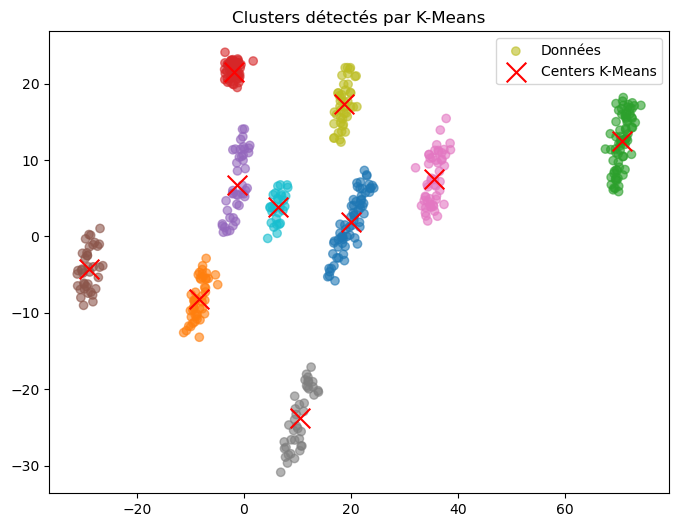

In [14]:
# Vérification qu'on a bien des données
if data.size > 0:
    # Mesurer le temps de calcul
    start_time = time.time()
    
    # Appliquer K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels_pred = kmeans.fit_predict(data)
    
    end_time = time.time()
    elapsed_time = end_time - start_time  # Temps en secondes

    # Affichage des coordonnées des centres trouvés par K-Means
    print("\nCentres trouvés par K-Means :")
    print(kmeans.cluster_centers_)

    # Calcul des performances de K-Means
    inertia = kmeans.inertia_  # Somme des distances intra-cluster
    print(f"\nInertie (somme des distances intra-cluster) : {inertia:.4f}")

    if n_clusters > 1:
        silhouette = silhouette_score(data, labels_pred)
        print(f"Score de silhouette : {silhouette:.4f}")

    print(f"\nTemps d'exécution de K-Means : {elapsed_time:.4f} secondes")

    # Visualisation des clusters détectés
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels_pred, cmap="tab10", alpha=0.6, label="Données")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centers K-Means")
    plt.legend()
    plt.title("Clusters détectés par K-Means")
    plt.show()
else:
    print("Aucune donnée générée.")

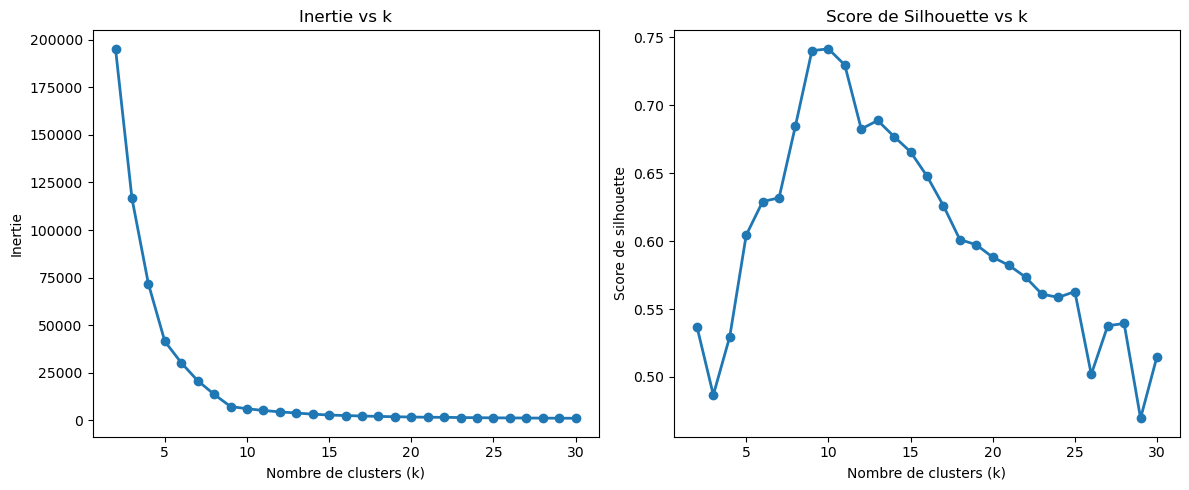

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# float_points : vos données reconstruites en float
data_arr = np.array(data)

ks = range(2, 31)
inertias    = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    labels = kmeans.fit_predict(data_arr)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(data_arr, labels))

# Tracé côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertie vs k
ax1.plot(ks, inertias, 'o-', linewidth=2)
ax1.set_title("Inertie vs k")
ax1.set_xlabel("Nombre de clusters (k)")
ax1.set_ylabel("Inertie")

# Silhouette vs k
ax2.plot(ks, silhouettes, 'o-', linewidth=2)
ax2.set_title("Score de Silhouette vs k")
ax2.set_xlabel("Nombre de clusters (k)")
ax2.set_ylabel("Score de silhouette")

plt.tight_layout()
plt.show()

In [17]:
!pip install pyclustering

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 275.8 kB/s eta 0:00:10
     - -------------------------------------- 0.1/2.6 MB 361.0 kB/s eta 0:00:07
     - -------------------------------------- 0.1/2.6 MB 361.0 kB/s eta 0:00:07
     - -------------------------------------- 0.1/2.6 MB 361.0 kB/s eta 0:00:07
     - -------------------------------------- 0.1/2.6 MB 361.0 kB/s eta 0:00:07
     - -------------------------------------- 0.1/2.6 MB 361.0 kB/s eta 0:00:07
     --- --------------

## Non-optimized X-means 

In [18]:
import random
from pyclustering.cluster.xmeans import xmeans

data_arr_bis = np.array(data)
# 2) Choix aléatoire des centres initiaux (k_min = 2 par exemple)
k_min = 2
initial_centers = data_arr_bis[random.sample(range(len(data_arr_bis)), k_min)].tolist()

# PAS de criterion, PAS de random_state, ccore=False
xm = xmeans(data            = data_arr_bis.tolist(),
            initial_centers = initial_centers,
            kmax            = 50,
            ccore           = False)

# exécution
xm.process()

# résultats
clusters = xm.get_clusters()
centers  = xm.get_centers()
print("Nombre de clusters détectés :", len(clusters))
# Combiner en un array et construire un vecteur d'étiquettes
data_arr_bis = np.array(data_arr_bis)              # shape (n_samples, 2)
labels = np.empty(len(data_arr_bis), dtype=int)

for cluster_id, indices in enumerate(clusters):
    labels[indices] = cluster_id

# Affichage des stats
print("Taille de chaque cluster :", [len(c) for c in clusters])
print("Centres finaux :\n", np.array(centers))

# Scatter plot coloré par cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_arr_bis[:, 0], data_arr_bis[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)
centers_arr = np.array(centers)
plt.scatter(centers_arr[:, 0], centers_arr[:, 1],
            c='red', marker='X', s=200, label='Centres X‑Means')
plt.title(f"Résultat X‑Means : {len(clusters)} clusters")
plt.xlabel("Coordonnée X")
plt.ylabel("Coordonnée Y")
plt.legend()
plt.show()

AttributeError: module 'numpy' has no attribute 'warnings'

## Optimized X-means 

Avant fusion : 5 clusters
Après fusion : 4 clusters
Tailles : [264, 164, 44, 29]
Centres finaux :
 [[-4.16460569  1.00178231]
 [24.58889024  7.90774665]
 [69.98559091 10.12780227]
 [71.60727586 16.08041379]]
Clusters après fusion d’overlap : 4


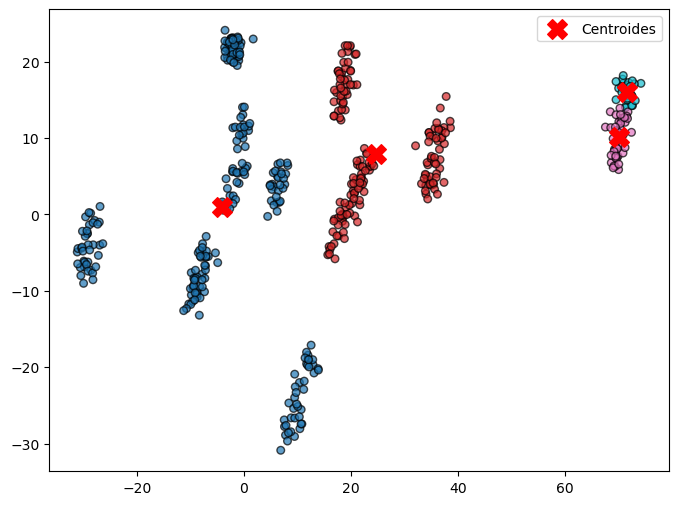

In [19]:
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from pyclustering.cluster.xmeans import xmeans

# Préparation des données (float_points → X_arr) 
X_arr = np.array(data)

# Patch numpy.warnings pour pouvoir activer C‑Core 
import numpy as _np
_np.warnings = warnings

# Initialisation aléatoire k_min centres 
k_min = 2
initial_centers = X_arr[random.sample(range(len(X_arr)), k_min)].tolist()

# Exécution de X‑Means (sans criterion, tolérance et C‑Core) 
xm = xmeans(
    data            = X_arr.tolist(),
    initial_centers = initial_centers,
    kmax            = 50,
    tolerance       = 0.1,   # seuil de split
    ccore           = True   # moteur C‑Core plus robuste
)
xm.process()

# Extraction des clusters initiaux et des centres 
clusters = xm.get_clusters()
centers  = np.array(xm.get_centers())
print("Avant fusion :", len(clusters), "clusters")

# Construction du vecteur de labels initial 
labels = np.empty(len(X_arr), dtype=int)
for cid, pts in enumerate(clusters):
    labels[pts] = cid

# Post‑fusion des petits clusters (<5% des points) 
N = len(X_arr)
min_size = 0.05 * N
small_ids = [i for i, pts in enumerate(clusters) if len(pts) < min_size]

for sid in small_ids:
    dists = cdist([centers[sid]], centers)[0]
    dists[sid] = np.inf
    nearest = dists.argmin()
    labels[clusters[sid]] = nearest

# Réindexation des labels pour qu’ils soient 0,1,2,… sans trous 
unique = np.unique(labels)
label_map = {old: new for new, old in enumerate(unique)}
labels = np.array([label_map[l] for l in labels])

# Reconstruction des clusters & centroïdes finaux 
new_clusters = []
new_centers  = []

for k in range(len(unique)):
    idx = np.where(labels == k)[0]
    new_clusters.append(idx.tolist())
    new_centers.append(X_arr[idx].mean(axis=0))
new_centers = np.array(new_centers)

print("Après fusion :", len(new_clusters), "clusters")
print("Tailles :", [len(c) for c in new_clusters])
print("Centres finaux :\n", new_centers)

def merge_overlapping_clusters(X_arr, labels, centers, alpha=0.75):
    # reconstruit la liste de clusters
    def build_clusters(la):
        clusters = []
        for k in np.unique(la):
            clusters.append(np.where(la == k)[0].tolist())
        return clusters

    clusters = build_clusters(labels)

    # calcule les rayons
    def compute_radii(centers, clusters):
        radii = []
        for cid, pts in enumerate(clusters):
            pts_coords = X_arr[pts]
            radii.append(np.max(np.linalg.norm(pts_coords - centers[cid], axis=1)))
        return np.array(radii)

    labels_new = labels.copy()
    centers_new = centers.copy()
    changed = True

    while changed:
        changed = False
        clusters = build_clusters(labels_new)
        centers_new = np.array([X_arr[pts].mean(axis=0) for pts in clusters])
        radii = compute_radii(centers_new, clusters)

        # matrice distances entre centres
        D = cdist(centers_new, centers_new)
        np.fill_diagonal(D, np.inf)

        # trouve la paire la plus proche
        i, j = np.unravel_index(np.argmin(D), D.shape)
        if D[i, j] < alpha * (radii[i] + radii[j]):
            # fusionne j dans i
            labels_new[labels_new == j] = i
            # renumérote ensuite pour avoir des labels contigus
            unique = np.unique(labels_new)
            remap = {old: new for new, old in enumerate(unique)}
            labels_new = np.array([remap[l] for l in labels_new])
            changed = True

    # dernier calcul des centres
    clusters = build_clusters(labels_new)
    centers_new = np.array([X_arr[pts].mean(axis=0) for pts in clusters])

    return labels_new, centers_new

# Usage juste après votre X‑Means + post‑fusion initiale  
labels_merged, centers_merged = merge_overlapping_clusters(X_arr, labels, new_centers, alpha=0.8)

print("Clusters après fusion d’overlap :", len(np.unique(labels_merged)))

# Visualisation rapide
plt.figure(figsize=(8,6))
plt.scatter(X_arr[:,0], X_arr[:,1], c=labels_merged, cmap='tab10', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centers_merged[:,0], centers_merged[:,1], marker='X', c='red', s=200, label='Centroides')
plt.legend()
plt.show()

#### Binary data in matrix form

In [20]:
# Fonction pour convertir un flottant en représentation IEEE 754 (32 bits)
def float_to_ieee754_bin(f):
    """Convertit un float en binaire IEEE 754 (32 bits)."""
    [binary] = struct.unpack(">I", struct.pack(">f", f))  # Conversion float → bits
    return np.array([int(bit) for bit in f"{binary:032b}"])  # Retourne une liste de 32 bits

# Initialisation des matrices
X = []
Y = []

if data.size > 0:
    for point in data:
        x_bin = float_to_ieee754_bin(point[0])
        y_bin = float_to_ieee754_bin(point[1])
        
        X.append(x_bin)  # Ajout de la représentation binaire de X
        Y.append(y_bin)  # Ajout de la représentation binaire de y
        print(point,x_bin,y_bin)


# Conversion en numpy array
X = np.array(X)
Y = np.array(Y)

# Affichage des résultats
print("Matrice X (représentation IEEE 754 des flottants) :")
print(X[:5])

print("\nMatrice Y (valeurs associées en binaire IEEE 754) :")
print(Y[:5])

[18.209 18.096] [0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0] [0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0]
[17.303 15.959] [0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1] [0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
[19.783 21.903] [0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0] [0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0]
[18.908 16.932] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0] [0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0]
[19.894 18.854] [0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0]
[18.932 13.672] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0] [0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
[17.573 18.753] [0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1

## Compression algorithm (GD)

In [21]:
def generalized_deduplication_compress(X, Y, base_bits=9):
    """
    Compresses two binary matrices (X and Y) using Generalized Deduplication with base ID association.

    Args:
        X (np.ndarray): The input binary matrix for X coordinates.
        Y (np.ndarray): The input binary matrix for Y coordinates.
        base_bits (int): The number of bits to use as the base for each matrix.

    Returns:
        tuple: A tuple containing the base IDs, deviations, and the shape of the original matrices.
    """
    assert X.shape == Y.shape, "X and Y must have the same shape"
    
    original_shape = X.shape
    base_ids = []
    deviations = []
    base_dict = {}  # Dictionary to store base and their IDs
    next_base_id = 0

    for x_row, y_row in zip(X, Y):
        if len(x_row) >= base_bits and len(y_row) >= base_bits:
            # Create the base by concatenating the first `base_bits` of X and Y
            base = tuple(x_row[:base_bits]) + tuple(y_row[:base_bits])
            # Create the deviation by concatenating the remaining bits of X and Y
            deviation = np.concatenate((x_row[base_bits:], y_row[base_bits:]))

            if base in base_dict:
                base_id = base_dict[base]
            else:
                base_id = next_base_id
                base_dict[base] = base_id
                next_base_id += 1

            base_ids.append(base_id)
            deviations.append(deviation)
        else:
            # Handle cases where row length is less than base_bits
            base = tuple(x_row[:]) + tuple(y_row[:])
            deviation = np.array([])

            if base in base_dict:
                base_id = base_dict[base]
            else:
                base_id = next_base_id
                base_dict[base] = base_id
                next_base_id += 1

            base_ids.append(base_id)
            deviations.append(deviation)

    return base_ids, deviations, original_shape, base_dict

#### Decompression algorithm

In [22]:
def generalized_deduplication_decompress(base_ids, deviations, original_shape, base_dict):
    """
    Decompresses a binary matrix compressed using Generalized Deduplication with base ID association.

    Args:
        base_ids (list): The list of base IDs.
        deviations (list): The list of deviation data.
        original_shape (tuple): The shape of the original matrix.
        base_dict (dict): The dictionary containing base and their IDs.

    Returns:
        np.ndarray: The decompressed matrix as a NumPy array.
    """
    reconstructed_matrix = []
    for base_id, deviation in zip(base_ids, deviations):
        base = None
        for b, b_id in base_dict.items():
            if b_id == base_id:
                base = np.array(b)
                break

        if base is not None:
            reconstructed_row = np.concatenate((base, deviation))
            reconstructed_matrix.append(reconstructed_row)
        else:
            print("Error: Base ID not found in base_dict")
            return None

    return np.array(reconstructed_matrix).reshape(original_shape)

In [23]:
# Compress the matrices X and Y
base_bits = 12  # Number of bits for the base
base_ids, deviations, original_shape, base_dict = generalized_deduplication_compress(X, Y, base_bits=base_bits)

print("\nBase IDs:", base_ids)
print("Deviations:", deviations)
print("Original Shape:", original_shape)
print("Base Dictionary:", base_dict)


Base IDs: [0, 1, 2, 3, 0, 4, 5, 0, 6, 0, 6, 2, 7, 8, 6, 9, 7, 10, 5, 11, 0, 12, 3, 3, 13, 3, 14, 4, 11, 11, 2, 0, 7, 14, 10, 15, 12, 14, 3, 0, 5, 3, 3, 15, 3, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 17, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 65, 71, 72, 73, 66, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 87, 96, 97, 92, 98, 98, 87, 99, 100, 101, 102, 103, 87, 104, 92, 105, 106, 98, 107, 108, 98, 105, 102, 109, 90, 105, 110, 92, 111, 112, 113, 114, 115, 116, 99, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 135, 143, 144, 145, 146, 147, 148, 145, 149, 150, 145, 151, 152, 153, 154, 144, 155, 156, 157, 129, 158, 159, 160, 161, 162, 156, 163, 143, 127, 164, 150, 165, 166, 167, 168, 129, 169, 170, 171, 172, 169, 173, 174

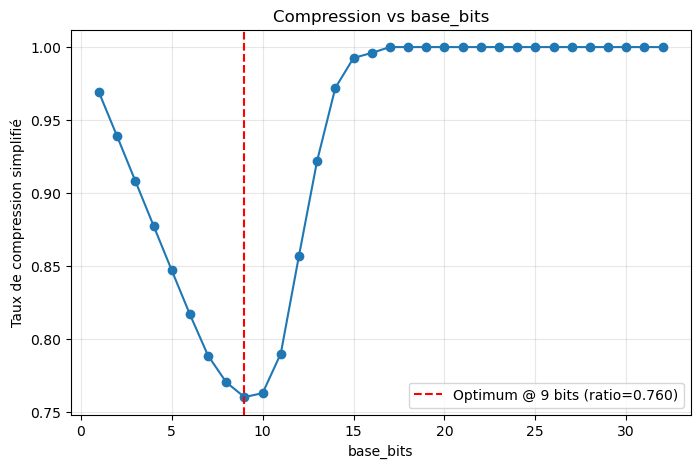

In [24]:
# 5) Calcul et tracé du ratio
X_bits = X
Y_bits = Y
n = X_bits.shape[0]
b = X_bits.shape[1] + Y_bits.shape[1]
max_bb = X_bits.shape[1]  # variant de 1 à 32
bbs = list(range(1, max_bb + 1))
ratios = []

for bb in bbs:
    _, _, _, base_dict_test = generalized_deduplication_compress(X_bits, Y_bits, bb)
    n_b = len(base_dict_test)
    l_b = 2 * bb
    l_c = b
    total_bits = n_b * l_b + n * (l_c - l_b)
    ratios.append(total_bits / (n * l_c))

# Visualisation
plt.figure(figsize=(8,5))
plt.plot(bbs, ratios, 'o-')
best = np.argmin(ratios)
plt.axvline(bbs[best], color='red', linestyle='--',
            label=f"Optimum @ {bbs[best]} bits (ratio={ratios[best]:.3f})")
plt.xlabel("base_bits")
plt.ylabel("Taux de compression simplifié")
plt.title("Compression vs base_bits")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

→ l_b optimal = 6 bits (η = 0.9382)


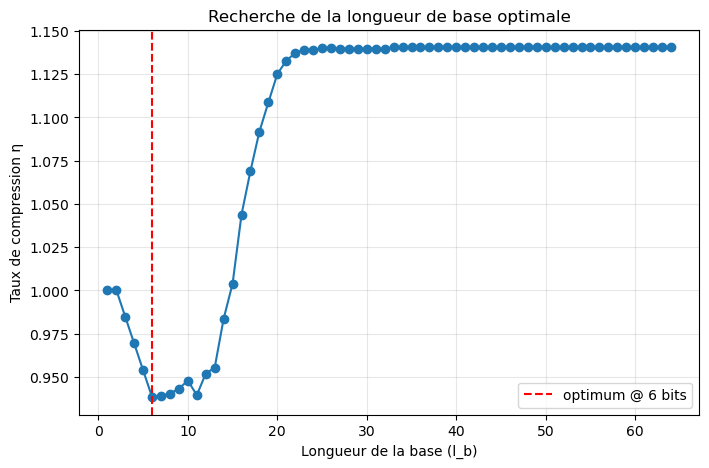

In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt

# ... Supposons que vous avez X_bits et Y_bits, shape (n, 32) chacun ... 

# 1) Construire le tableau de chunks 64 bits
n = X_bits.shape[0]
l_s = 32 + 32            # bits par échantillon (X + Y)
c   = 1                  # pas de concaténation supplémentaire
l_c = c * l_s            # bits par chunk
n_c = n // c             # nombre de chunks = n

# on convertit chaque ligne binaire en un entier
chunks = []
for xb, yb in zip(X_bits, Y_bits):
    bitstr = ''.join(map(str, xb)) + ''.join(map(str, yb))
    chunks.append(int(bitstr, 2))
chunks = np.array(chunks, dtype=np.uint64)

# 2) Boucle sur l_b de 1 à l_c
etas = []
l_b_values = range(1, l_c + 1)

for l_b in l_b_values:
    shift = l_c - l_b
    # extraire la base (les l_b bits de poids forts)
    bases_bis = chunks >> shift
    
    # nombre de bases uniques
    n_b = len(np.unique(bases_bis))
    
    # longueur de l'ID de base
    l_id = math.ceil(math.log2(n_b)) if n_b > 1 else 1
    
    # longueur de la déviation
    l_d = l_c - l_b
    
    # taux de compression η
    numerator   = n_b * l_b + n_c * (l_id + l_d)
    denominator = n * l_s
    eta = numerator / denominator
    
    etas.append(eta)

# 3) On repère le minimum de η
best_idx = int(np.argmin(etas))
best_l_b = l_b_values[best_idx]
best_eta = etas[best_idx]
print(f"→ l_b optimal = {best_l_b} bits (η = {best_eta:.4f})")

# 4) Tracé de η vs l_b
plt.figure(figsize=(8, 5))
plt.plot(l_b_values, etas, marker='o')
plt.axvline(best_l_b, color='red', linestyle='--',
            label=f"optimum @ {best_l_b} bits")
plt.xlabel("Longueur de la base (l_b)")
plt.ylabel("Taux de compression η")
plt.title("Recherche de la longueur de base optimale")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [27]:
def compare_bitwise(a, b):
    """Compare deux tableaux de bits et retourne le plus petit et le plus grand bit à bit (poids fort à faible)."""
    for i in range(len(a)):
        if a[i] < b[i]:
            return a, b
        elif a[i] > b[i]:
            return b, a
    return a, b  # Si identiques

def compute_centroids(base_ids, deviations):
    unique_ids = np.unique(base_ids)
    centroids = {}
    weighted_centroids = {"max_deviation": {}, "mean_deviation": {}, "prod_deviation": {}}
    
    for uid in unique_ids:
        # Récupérer les indices correspondant à l'ID courant
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        # Extraire les valeurs
        selected_values = [deviations[i] for i in indices]
        # Trouver manuellement min et max en comparant bit par bit
        min_val = selected_values[0]
        max_val = selected_values[0]
        
        for val in selected_values:
            min_val, _ = compare_bitwise(min_val, val)
            _, max_val = compare_bitwise(max_val, val)
        
        print("Min:", min_val, "Max:", max_val)
        
         # Calculer la moyenne entre min et max (en entier)
        min_int = int(''.join(map(str, min_val)), 2)
        max_int = int(''.join(map(str, max_val)), 2)
        
        print("Min int:", min_int, "Max int:", max_int)
        mean_int = (min_int + max_int) // 2  # Moyenne des deux entiers
        
        # Convertir la moyenne en binaire
        mean_bin = bin(mean_int)[2:]  # On enlève le préfixe '0b'
        
        # Calculer le centroïde comme la moyenne entre min et max
        centroid = [int(bit) for bit in mean_bin.zfill(len(min_val))]  # Compléter avec des zéros si nécessaire
        
        centroids[uid] = centroid

        # Compute the maximum deviation (bitwise max - min for each dimension)
        max_deviations = []
        for i in range(len(min_val)):
            max_bit = 0
            min_bit = 1
            for val in selected_values:
                if val[i] > max_bit:
                    max_bit = val[i]
                if val[i] < min_bit:
                    min_bit = val[i]
            max_deviations.append(max_bit - min_bit)
        
        # Store the results for the maximum deviation
        print(f"Max Deviations for ID {uid}: {max_deviations}")
        
        # Calculate weighted centroids using different methods
        
        # (i) Maximum of the maximum deviations
        max_weighted_centroid = [centroid[i] * max_deviations[i] for i in range(len(centroid))]
        weighted_centroids["max_deviation"][uid] = max_weighted_centroid
        
        # (ii) Mean of the maximum deviations
        mean_deviation = np.mean(max_deviations)
        mean_weighted_centroid = [centroid[i] * mean_deviation for i in range(len(centroid))]
        weighted_centroids["mean_deviation"][uid] = mean_weighted_centroid
        
        # (iii) Product of the maximum deviations
        prod_deviation = np.prod(max_deviations)
        prod_weighted_centroid = [centroid[i] * prod_deviation for i in range(len(centroid))]
        weighted_centroids["prod_deviation"][uid] =  prod_weighted_centroid
    
    return centroids, weighted_centroids
    
centroids, weighted_centroids = compute_centroids(base_ids, deviations)
print("Centroids:", centroids)
print("Weighted Centroids:", weighted_centroids)

Min: [0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1
 1 0 0] Max: [1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 1]
Min int: 114898814108 Max int: 1067625882321
Max Deviations for ID 0: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Min: [1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0] Max: [1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0]
Min int: 716332554256 Max int: 716332554256
Max Deviations for ID 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Min: [0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 1 1 0] Max: [1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 0]
Min int: 169875125830 Max int: 980216133976
Max Deviations for ID 2: [1, 1, 0, 1, 0, 1, 1, 

In [28]:
def reconstruct_points(base_dict, centroids, base_bits=12, centroid_bits=20):
    """
    Reconstructs the original points (X, Y) from the centroids and base dictionary.

    Args:
        base_dict (dict): Dictionary mapping bases to their IDs.
        centroids (dict): Dictionary mapping base IDs to their centroids.
        base_bits (int): Number of bits used for the base.
        centroid_bits (int): Number of bits in the centroid.

    Returns:
        list: A list of reconstructed points [(X1, Y1), (X2, Y2), ...].
    """
    reconstructed_points = []

    # Inverse the base_dict to map IDs back to bases
    id_to_base = {v: k for k, v in base_dict.items()}

    for base_id, centroid in centroids.items():
        # Retrieve the base corresponding to the base_id
        base = id_to_base[base_id]

        # Split the base into its X and Y components
        base_x = list(base[:base_bits])  # Convert tuple slice to list (X part of the base)
        base_y = list(base[base_bits:])  # Convert tuple slice to list (Y part of the base)

        # Split the centroid into its X and Y components
        centroid_x = centroid[:centroid_bits]  # First `centroid_bits` bits (X part of the centroid)
        centroid_y = centroid[centroid_bits:]  # Last `centroid_bits` bits (Y part of the centroid)

        # Reconstruct X coordinate
        x_bits = base_x + centroid_x  # Concatenate base X and centroid X

        # Reconstruct Y coordinate
        y_bits = base_y + centroid_y  # Concatenate base Y and centroid Y

        # Append the reconstructed point (X, Y)
        reconstructed_points.append((x_bits, y_bits))

    return reconstructed_points

In [29]:
# Reconstruction des points
reconstructed_points = reconstruct_points(base_dict, centroids)
print("Reconstructed Points:", reconstructed_points[0])
print("Taille", len(reconstructed_points))

Reconstructed Points: ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])
Taille 310


#### From binary to float

In [30]:
def ieee754_bin_to_float(bits):
    """
    Convertit une représentation binaire IEEE 754 (32 bits) en flottant.

    Args:
        bits (list): Une liste de 32 bits (0 ou 1).

    Returns:
        float: La valeur flottante correspondante.
    """
    # Convertir les bits en une chaîne binaire
    binary_str = ''.join(map(str, bits))
    
    # Convertir la chaîne binaire en un entier non signé
    integer_value = int(binary_str, 2)
    
    # Interpréter l'entier comme un flottant IEEE 754 (32 bits)
    [float_value] = struct.unpack(">f", struct.pack(">I", integer_value))
    
    return float_value

In [31]:
# Conversion des points reconstruits en flottants
def convert_reconstructed_points_to_float(reconstructed_points):
    """
    Convertit les points reconstruits (en bits IEEE 754) en coordonnées flottantes.

    Args:
        reconstructed_points (list): Liste des points sous forme de tuples de listes de bits [(X_bits, Y_bits), ...].

    Returns:
        list: Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
    """
    float_points = []
    for x_bits, y_bits in reconstructed_points:
        # Convertir les bits en flottants
        x_float = ieee754_bin_to_float(x_bits)
        y_float = ieee754_bin_to_float(y_bits)
        float_points.append((x_float, y_float))
    return float_points

In [32]:
# Conversion des points reconstruits en flottants
float_points = convert_reconstructed_points_to_float(reconstructed_points)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(19.075498580932617, 19.431499481201172)
(17.30299949645996, 15.958999633789062)
(19.046001434326172, 20.496000289916992)
(18.960500717163086, 17.362499237060547)
(18.594999313354492, 13.703499794006348)
(17.695499420166016, 19.585498809814453)
(19.395999908447266, 22.09000015258789)
(18.691999435424805, 15.603499412536621)
(16.827999114990234, 14.753000259399414)
(17.649999618530273, 13.553999900817871)
(17.423500061035156, 16.63599967956543)
(18.315000534057617, 14.774499893188477)
(20.855499267578125, 21.977998733520508)
(18.136999130249023, 12.352999687194824)
(17.36050033569336, 12.266999244689941)
(20.770999908447266, 16.963499069213867)
(-3.3357999324798584, 4.672900199890137)
(-2.079200029373169, 5.6257500648498535)
(-0.46303999423980713, 5.642600059509277)
(0.24063999950885773, 8.882499694824219)
(0.6174899935722351, 6.320199966430664)
(-1.201799988746643, 8.58329963684082)
(-2.0757999420166016, 6.008299827575684)
(0.30390000343322754, 6.0392

In [33]:
# Affichage des points reconstruits
def plot_reconstructed_points(float_points):
    """
    Affiche les points reconstruits dans un graphique 2D.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
    """
    # Extraire les coordonnées X et Y
    x_coords, y_coords = zip(*float_points)

    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', s=50, alpha=0.7, edgecolor='k')
    plt.title("Points Reconstruits", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)

    # Afficher le graphique
    plt.show()

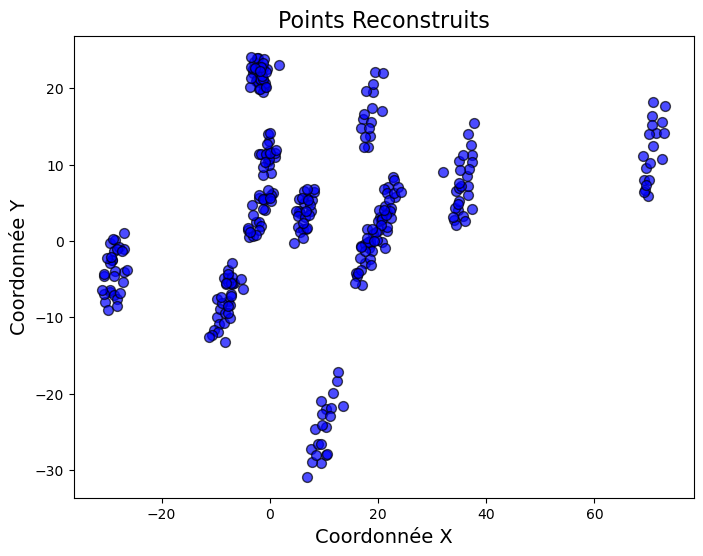

In [34]:
plot_reconstructed_points(float_points)

In [35]:
# Application de K-Means et visualisation
def apply_kmeans_and_plot(float_points, n_clusters):
    """
    Applique K-Means sur les points reconstruits et affiche les clusters ainsi que les métriques.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
        n_clusters (int): Nombre de clusters pour K-Means.
    """
    # Conversion en tableau NumPy
    points_array = np.array(float_points)

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Initialisation et application de K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(points_array)

    # Mesurer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time

    # Centres des clusters
    cluster_centers = kmeans.cluster_centers_

    # Inertie (somme des distances intra-cluster)
    inertia = kmeans.inertia_

    # Score de silhouette (si plus de 1 cluster)
    if n_clusters > 1:
        silhouette = silhouette_score(points_array, labels)
    else:
        silhouette = None  # Le score de silhouette n'est pas défini pour un seul cluster

    # Afficher les résultats
    print("Centres trouvés par K-Means :")
    print(cluster_centers)
    print("\nInertie (somme des distances intra-cluster) :", inertia)
    if silhouette is not None:
        print("Score de silhouette :", silhouette)
    print(f"\nTemps d'exécution de K-Means : {execution_time:.4f} secondes")

    # Visualisation des clusters
    plt.figure(figsize=(8, 6))
    for cluster_id in range(n_clusters):
        # Sélectionner les points appartenant au cluster actuel
        cluster_points = points_array[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)

    # Afficher les centres des clusters
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label="Centres des Clusters")

    # Ajouter des détails au graphique
    plt.title("Clustering avec K-Means", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

Centres trouvés par K-Means :
[[ -8.11705142  -7.74031026]
 [ 35.57672232   7.38291475]
 [  1.79080878   5.55730705]
 [-28.84070962  -3.90707253]
 [ 19.77841818   1.37943817]
 [ 70.58186862  11.64558145]
 [ -1.73355415  21.40112808]
 [ 10.00511185 -24.45919028]
 [ 18.50649977  16.71940583]]

Inertie (somme des distances intra-cluster) : 4987.695666658826
Score de silhouette : 0.6902972564983177

Temps d'exécution de K-Means : 0.0077 secondes


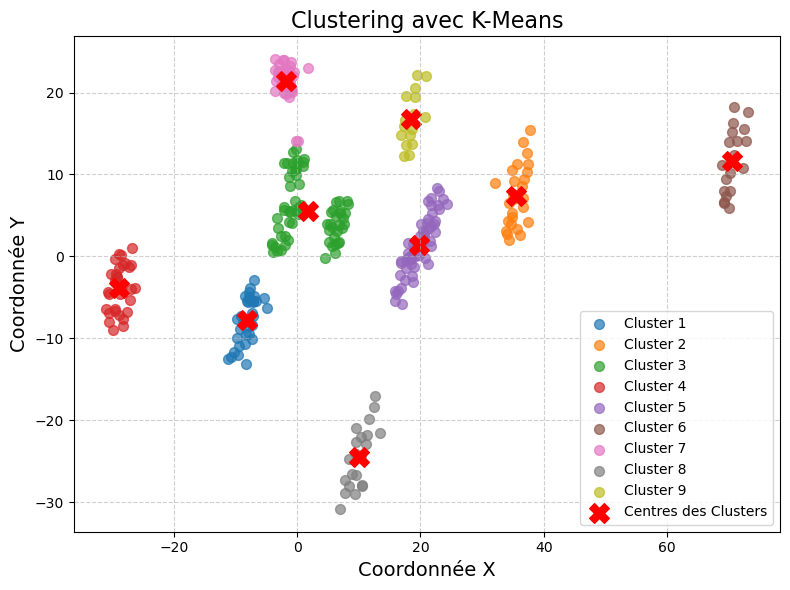

In [36]:
apply_kmeans_and_plot(float_points, n_clusters = 9)

#### Optimal k 

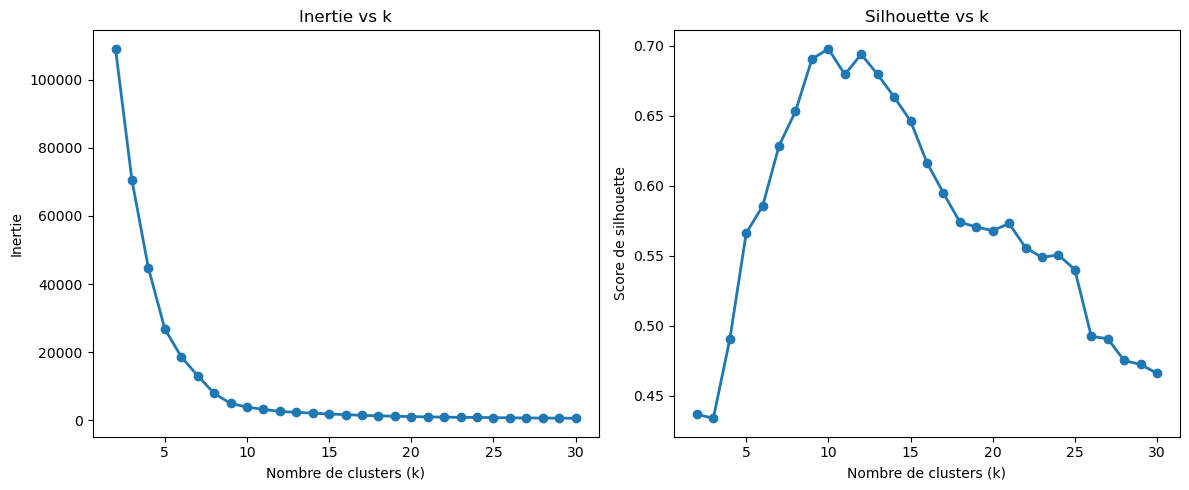

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# float_points : vos données reconstruites en float
float_points_bis = np.array(float_points)

ks = range(2, 31)
inertias = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    labels = kmeans.fit_predict(float_points_bis)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(float_points_bis, labels))

# Tracés
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertie
ax1.plot(ks, inertias, 'o-', linewidth=2)
ax1.set(title='Inertie vs k', xlabel='Nombre de clusters (k)', ylabel='Inertie')

# Silhouette
ax2.plot(ks, silhouettes, 'o-', linewidth=2)
ax2.set(title='Silhouette vs k', xlabel='Nombre de clusters (k)', ylabel='Score de silhouette')

plt.tight_layout()

Nombre de clusters détectés : 4
Taille de chaque cluster : [102, 9, 10, 189]
Centres finaux :
 [[23.47793625  4.56710582]
 [71.40716638 15.25555536]
 [69.83910065  8.39660492]
 [-5.05835456  2.0713311 ]]


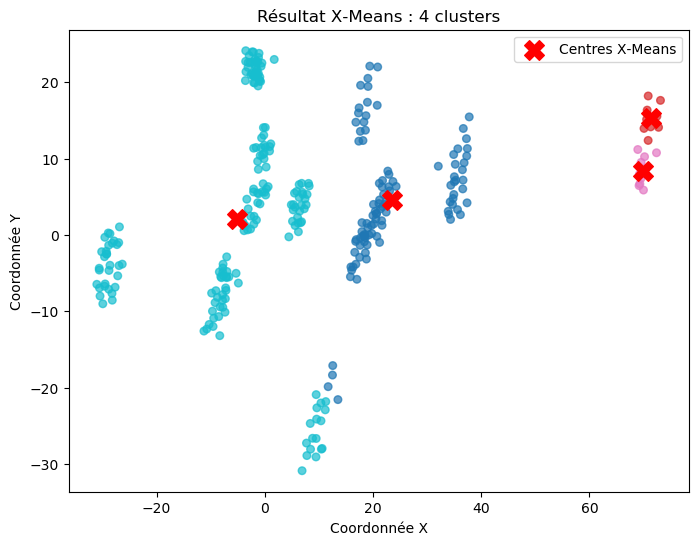

In [38]:
# Apply non-optimized X-means on the data
float_points_bis= np.array(float_points)
# 2) Choix aléatoire des centres initiaux (k_min = 2 par exemple)
k_min = 2
initial_centers = float_points_bis[random.sample(range(len(float_points_bis)), k_min)].tolist()

# PAS de criterion, PAS de random_state, ccore=False
xm = xmeans(data            = float_points_bis.tolist(),
            initial_centers = initial_centers,
            kmax            = 50,
            ccore           = False)

# exécution
xm.process()

# résultats
clusters = xm.get_clusters()
centers  = xm.get_centers()
print("Nombre de clusters détectés :", len(clusters))
# Combiner en un array et construire un vecteur d'étiquettes
float_points_bis = np.array(float_points_bis)              # shape (n_samples, 2)
labels = np.empty(len(float_points_bis), dtype=int)

for cluster_id, indices in enumerate(clusters):
    labels[indices] = cluster_id

# Affichage des stats
print("Taille de chaque cluster :", [len(c) for c in clusters])
print("Centres finaux :\n", np.array(centers))

# Scatter plot coloré par cluster
plt.figure(figsize=(8, 6))
plt.scatter(float_points_bis[:, 0], float_points_bis[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)
centers_arr = np.array(centers)
plt.scatter(centers_arr[:, 0], centers_arr[:, 1],
            c='red', marker='X', s=200, label='Centres X‑Means')
plt.title(f"Résultat X‑Means : {len(clusters)} clusters")
plt.xlabel("Coordonnée X")
plt.ylabel("Coordonnée Y")
plt.legend()
plt.show()

Avant fusion : 3 clusters
Après fusion : 3 clusters
Tailles : [101, 19, 190]
Centres finaux :
 [[23.59452473  4.80899794]
 [70.58186862 11.64558145]
 [-4.97013954  1.955882  ]]


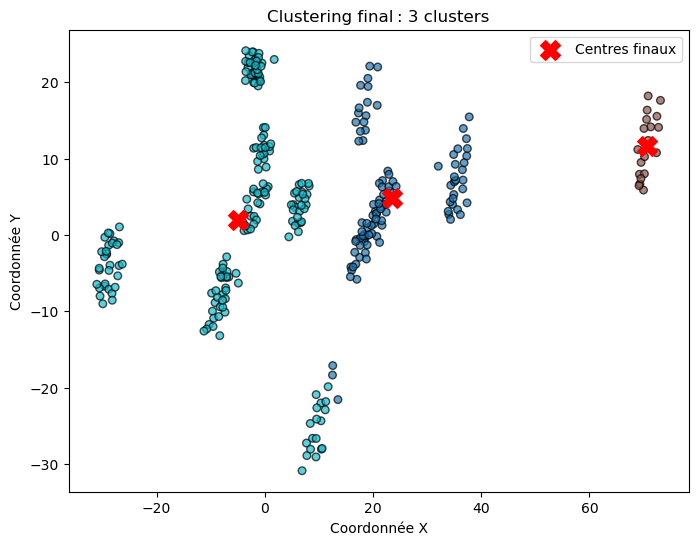

In [39]:
# Apply optimized X-means on the data
# Préparation des données (float_points → X_arr) 
X_arr = np.array(float_points)

# Patch numpy.warnings pour pouvoir activer C‑Core 
import numpy as _np
_np.warnings = warnings

# Initialisation aléatoire k_min centres
k_min = 2
initial_centers = X_arr[random.sample(range(len(X_arr)), k_min)].tolist()

# Exécution de X‑Means (sans criterion, tolérance et C‑Core) 
xm = xmeans(
    data            = X_arr.tolist(),
    initial_centers = initial_centers,
    kmax            = 50,
    tolerance       = 0.5,   # seuil de split
    ccore           = True   # moteur C‑Core plus robuste
)
xm.process()

# Extraction des clusters initiaux et des centres 
clusters = xm.get_clusters()
centers  = np.array(xm.get_centers())
print("Avant fusion :", len(clusters), "clusters")

# Construction du vecteur de labels initial 
labels = np.empty(len(X_arr), dtype=int)
for cid, pts in enumerate(clusters):
    labels[pts] = cid

# Post‑fusion des petits clusters (<5% des points) 
N = len(X_arr)
min_size = 0.035 * N
small_ids = [i for i, pts in enumerate(clusters) if len(pts) < min_size]

for sid in small_ids:
    dists = cdist([centers[sid]], centers)[0]
    dists[sid] = np.inf
    nearest = dists.argmin()
    labels[clusters[sid]] = nearest

# Réindexation des labels pour qu’ils soient 0,1,2,… sans trous 
unique = np.unique(labels)
label_map = {old: new for new, old in enumerate(unique)}
labels = np.array([label_map[l] for l in labels])

# Reconstruction des clusters & centroïdes finaux 
new_clusters = []
new_centers  = []

for k in range(len(unique)):
    idx = np.where(labels == k)[0]
    new_clusters.append(idx.tolist())
    new_centers.append(X_arr[idx].mean(axis=0))
new_centers = np.array(new_centers)

print("Après fusion :", len(new_clusters), "clusters")
print("Tailles :", [len(c) for c in new_clusters])
print("Centres finaux :\n", new_centers)


# --- 9) Visualisation finale ---
plt.figure(figsize=(8, 6))
plt.scatter(X_arr[:, 0], X_arr[:, 1], c=labels, cmap='tab10',
            s=30, alpha=0.7, edgecolor='k')
plt.scatter(new_centers[:, 0], new_centers[:, 1],
            c='red', marker='X', s=200, label='Centres finaux')
plt.title(f"Clustering final : {len(new_clusters)} clusters")
plt.xlabel("Coordonnée X")
plt.ylabel("Coordonnée Y")
plt.legend()
plt.show()

In [40]:
def compute_centroids_with_weights(base_ids, deviations):
    """
    Calcule les centroïdes pour chaque base ID et associe un poids à chaque base.
    Le poids est défini comme le nombre de déviations associées à la base.

    Args:
        base_ids (list): Liste des IDs des bases.
        deviations (list): Liste des déviations associées.

    Returns:
        dict: Dictionnaire contenant les centroïdes pour chaque base ID.
        dict: Dictionnaire contenant les poids pour chaque base ID.
    """
    unique_ids = np.unique(base_ids)
    centroids = {}
    weights = {}

    for uid in unique_ids:
        # Récupérer les indices correspondant à l'ID courant
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        # Extraire les déviations associées
        selected_values = [deviations[i] for i in indices]

        # Convertir en entier, puis calculer la moyenne
        ints = [int(''.join(map(str, val)), 2) for val in selected_values]
        mean_int = round(np.mean(ints))

        # Reconvertir la moyenne en binaire
        mean_bits = [int(x) for x in bin(mean_int)[2:].zfill(len(selected_values[0]))]

        centroids[uid] = mean_bits
        weights[uid] = len(selected_values)

        """
        # Trouver manuellement min et max en comparant bit par bit
        min_val = selected_values[0]
        max_val = selected_values[0]

        for val in selected_values:
            min_val, _ = compare_bitwise(min_val, val)
            _, max_val = compare_bitwise(max_val, val)

        # Calculer la moyenne entre min et max (en entier)
        min_int = int(''.join(map(str, min_val)), 2)
        max_int = int(''.join(map(str, max_val)), 2)
        mean_int = (min_int + max_int) // 2  # Moyenne des deux entiers

        # Convertir la moyenne en binaire
        mean_bin = bin(mean_int)[2:]  # On enlève le préfixe '0b'
        
        # Calculer le centroïde comme la moyenne entre min et max
        centroid = [int(bit) for bit in mean_bin.zfill(len(min_val))]  # Compléter avec des zéros si nécessaire
        centroids[uid] = centroid

        # Associer un poids à la base (nombre de déviations associées)
        weights[uid] = len(selected_values)
        """
    return centroids, weights

# Exemple d'utilisation
centroids_with_weights, weights = compute_centroids_with_weights(base_ids, deviations)
print("Centroids with Weights:", centroids_with_weights)
print("Weights:", weights)

Centroids with Weights: {0: [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], 1: [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 2: [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], 3: [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 4: [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], 5: [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 6: [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 7: [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 

In [41]:
# Reconstruction des points
reconstructed_points_bis = reconstruct_points(base_dict, centroids_with_weights)
print("Reconstructed Points:", reconstructed_points_bis[0])
print("Taille", len(reconstructed_points_bis))

Reconstructed Points: ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])
Taille 310


In [42]:
# Conversion des points reconstruits en flottants
float_points_bis = convert_reconstructed_points_to_float(reconstructed_points)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(19.075498580932617, 19.431499481201172)
(17.30299949645996, 15.958999633789062)
(19.046001434326172, 20.496000289916992)
(18.960500717163086, 17.362499237060547)
(18.594999313354492, 13.703499794006348)
(17.695499420166016, 19.585498809814453)
(19.395999908447266, 22.09000015258789)
(18.691999435424805, 15.603499412536621)
(16.827999114990234, 14.753000259399414)
(17.649999618530273, 13.553999900817871)
(17.423500061035156, 16.63599967956543)
(18.315000534057617, 14.774499893188477)
(20.855499267578125, 21.977998733520508)
(18.136999130249023, 12.352999687194824)
(17.36050033569336, 12.266999244689941)
(20.770999908447266, 16.963499069213867)
(-3.3357999324798584, 4.672900199890137)
(-2.079200029373169, 5.6257500648498535)
(-0.46303999423980713, 5.642600059509277)
(0.24063999950885773, 8.882499694824219)
(0.6174899935722351, 6.320199966430664)
(-1.201799988746643, 8.58329963684082)
(-2.0757999420166016, 6.008299827575684)
(0.30390000343322754, 6.0392

In [43]:
# Conversion des points reconstruits en flottants
float_points = convert_reconstructed_points_to_float(reconstructed_points_bis)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(19.0528564453125, 19.610000610351562)
(17.30299949645996, 15.958999633789062)
(19.16200065612793, 20.769332885742188)
(18.870624542236328, 17.964500427246094)
(18.594999313354492, 13.703499794006348)
(17.67366600036621, 19.322999954223633)
(19.37933349609375, 22.09200096130371)
(18.605998992919922, 15.864333152770996)
(16.827999114990234, 14.753000259399414)
(17.649999618530273, 13.553999900817871)
(17.423500061035156, 16.63599967956543)
(18.369335174560547, 14.003999710083008)
(20.855499267578125, 21.97800064086914)
(18.136999130249023, 12.352999687194824)
(17.198667526245117, 12.142333030700684)
(20.770999908447266, 16.9635009765625)
(-3.3357999324798584, 4.672900199890137)
(-2.079200029373169, 5.6257500648498535)
(-0.46303999423980713, 5.642600059509277)
(0.24063999950885773, 8.882499694824219)
(0.6174899935722351, 6.320199966430664)
(-1.201799988746643, 8.58329963684082)
(-2.0757999420166016, 6.008299827575684)
(0.30390000343322754, 6.03929996490

In [44]:
def apply_kmeans_with_weights_and_plot(float_points, weights, n_clusters):
    """
    Applique K-Means sur les points reconstruits en tenant compte des poids et affiche les clusters ainsi que les métriques.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
        weights (dict): Dictionnaire contenant les poids associés à chaque base ID.
        n_clusters (int): Nombre de clusters pour K-Means.
    """
    # Conversion en tableau NumPy
    points_array = np.array(float_points)

    # Création d'un tableau de poids aligné avec les points
    weight_array = np.array([weights[base_id] for base_id in range(len(float_points))])

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Initialisation et application de K-Means avec les poids
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(points_array, sample_weight=weight_array)

    # Mesurer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time

    # Centres des clusters
    cluster_centers = kmeans.cluster_centers_

    # Inertie (somme des distances intra-cluster)
    inertia = kmeans.inertia_

    # Score de silhouette (sans poids, car non supporté)
    if n_clusters > 1:
        silhouette = silhouette_score(points_array, labels)
    else:
        silhouette = None  # Le score de silhouette n'est pas défini pour un seul cluster

    # Afficher les résultats
    print("Centres trouvés par K-Means :")
    print(cluster_centers)
    print("\nInertie (somme des distances intra-cluster) :", inertia)
    if silhouette is not None:
        print("Score de silhouette :", silhouette)
    print(f"\nTemps d'exécution de K-Means : {execution_time:.4f} secondes")

    # Visualisation des clusters
    plt.figure(figsize=(8, 6))
    for cluster_id in range(n_clusters):
        # Sélectionner les points appartenant au cluster actuel
        cluster_points = points_array[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)

    # Afficher les centres des clusters
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label="Centres des Clusters")

    # Ajouter des détails au graphique
    plt.title("Clustering avec K-Means (avec poids)", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

Centres trouvés par K-Means :
[[ 18.03531232  -1.47312655]
 [ 70.6298222   12.51308625]
 [  1.84423799   5.52620605]
 [ 35.54890391   7.56761344]
 [ -8.38403536  -8.22377502]
 [ -1.88375533  21.63187681]
 [-29.02433346  -4.1921256 ]
 [ 18.68244425  17.52782241]
 [ 10.4007316  -23.77995114]
 [ 21.8912856    4.99978854]]

Inertie (somme des distances intra-cluster) : 6230.878931888783
Score de silhouette : 0.6593880237825617

Temps d'exécution de K-Means : 0.0070 secondes


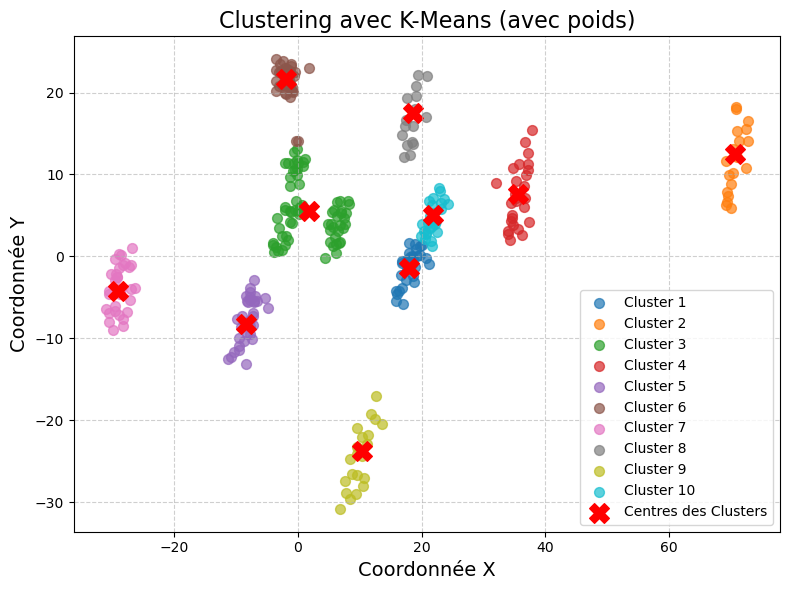

In [45]:
apply_kmeans_with_weights_and_plot(float_points, weights, n_clusters=n_clusters)

In [46]:
def compute_weighted_centroids(base_dict, base_ids, deviations, base_bits=9):
    unique_ids = np.unique(base_ids)
    centroids = {}
    max_of_max_deviations = {}
    mean_of_max_deviations = {}
    prod_of_max_deviations = {}

    id_to_bases = {uid: [] for uid in unique_ids}
    for base, bid in base_dict.items():
        if bid in id_to_bases:
            id_to_bases[bid].append(base)

    for uid in unique_ids:
        base_tuple = id_to_bases[uid][0]  # base = 18 bits (9 + 9)
        base_x = list(base_tuple[:base_bits])
        base_y = list(base_tuple[base_bits:2 * base_bits])
        base_bits_full = base_x + base_y  # 18 bits

        # Récupérer les déviations (46 bits) associées à l'uid
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        selected_deviations = [deviations[i] for i in indices]

        # Initialisation
        min_dev = selected_deviations[0]
        max_dev = selected_deviations[0]

        for dev in selected_deviations:
            min_dev, _ = compare_bitwise(min_dev, dev)
            _, max_dev = compare_bitwise(max_dev, dev)

        # Moyenne bitwise sur l'ensemble des 46 bits
        min_int = int(''.join(map(str, min_dev)), 2)
        max_int = int(''.join(map(str, max_dev)), 2)
        mean_int = (min_int + max_int) // 2
        mean_dev_bin = bin(mean_int)[2:].zfill(46)
        mean_dev = [int(b) for b in mean_dev_bin]

        # Centroïde complet = base_x + base_y + moyenne des déviations
        centroid = mean_dev
        centroids[uid] = centroid

        # Pour le poids "max of max" : concat base_x + max_dev_x, base_y + max_dev_y
        max_dev_x = [val[:23] for val in selected_deviations]
        max_dev_y = [val[23:] for val in selected_deviations]

        # Trouver les plus grandes déviations X et Y
        max_dx = max_dev_x[0]
        max_dy = max_dev_y[0]
        for dx, dy in zip(max_dev_x, max_dev_y):
            _, max_dx = compare_bitwise(max_dx, dx)
            _, max_dy = compare_bitwise(max_dy, dy)

        # Concat binaire
        base_x_str = ''.join(map(str, base_x))
        base_y_str = ''.join(map(str, base_y))
        max_dx_str = ''.join(map(str, max_dx))
        max_dy_str = ''.join(map(str, max_dy))

        concat_x = int(base_x_str + max_dx_str, 2)
        concat_y = int(base_y_str + max_dy_str, 2)
        
        maximum_weight = concat_x if concat_x > concat_y else concat_y
        mean_weight = (concat_x + concat_y)//2
        prod_weight = (concat_x * concat_y)//1000000

        max_of_max_deviations[uid] = maximum_weight
        mean_of_max_deviations[uid] = mean_weight
        prod_of_max_deviations[uid] = prod_weight//10000

        #print(f"UID: {uid}, Centroid: {centroid}, MaxWeight: , MeanWeight: {mean_weight:.4f}, ProdWeight: {prod_weight:.4f}")

    return centroids, max_of_max_deviations, mean_of_max_deviations, prod_of_max_deviations


In [47]:
print("Calcul des centroids et de leur poids ")
centroids2, max_of_max, mean_of_max, prod_of_max= compute_weighted_centroids(base_dict, base_ids, deviations)
reconstructed_points_2 = reconstruct_points(base_dict, centroids2)
float_points = convert_reconstructed_points_to_float(reconstructed_points_2)

print("Centroids: ", float_points)
print("Weigths max of max: ", max_of_max)
print("Weigths mean of max: ", mean_of_max)
print("Weigths product of max: ",prod_of_max)

Calcul des centroids et de leur poids 


error: argument out of range

K-means sur les maximum de déviation
Méthode 1: Moyennne des Maximums de déviations
Centres trouvés par K-Means :
[[ -8.11475629  -7.70375977]
 [ 19.79230083   1.39952036]
 [ -0.5652922   11.22246696]
 [-28.84244224  -3.89185333]
 [ 70.62057576  11.71471878]
 [ -1.88895855  21.73743478]
 [ 35.56193788   7.39731571]
 [ 10.01603173 -24.51387205]
 [ 18.49747274  16.73859768]
 [  0.45542542   3.59048469]]

Inertie (somme des distances intra-cluster) : 3506375268129.0645
Score de silhouette : 0.6778432955290938

Temps d'exécution de K-Means : 0.0061 secondes


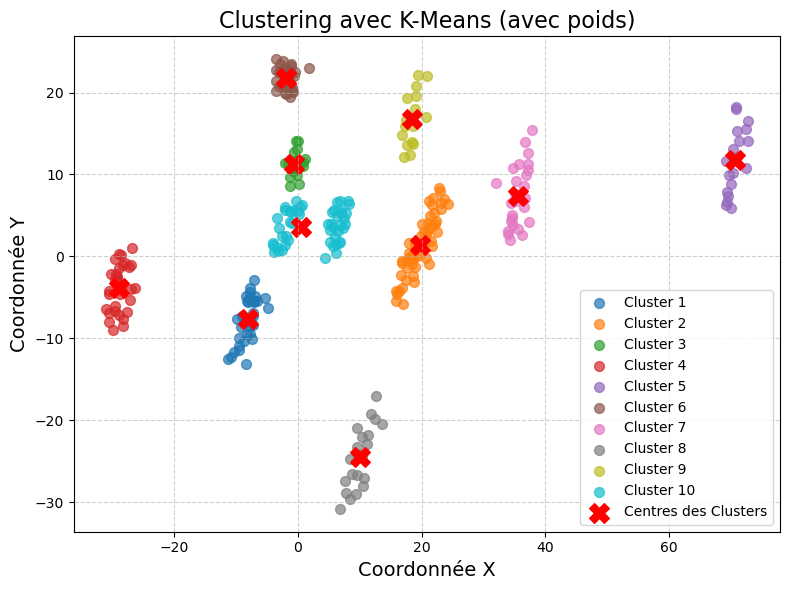

In [48]:
print("K-means sur les maximum de déviation")
print("Méthode 1: Moyennne des Maximums de déviations")
apply_kmeans_with_weights_and_plot(float_points, mean_of_max, n_clusters=n_clusters)

Méthode 2: produit des des de déviations
Centres trouvés par K-Means :
[[ -7.75335819  -6.97530169]
 [ -2.0103122   21.58653038]
 [-28.96142366  -4.01231372]
 [ 19.20551104  17.56597137]
 [  6.60384506   3.84889813]
 [ 71.48404111  12.83901945]
 [ 20.20826823   1.82204363]
 [ 10.07513006 -24.41577187]
 [ -1.51757711   6.00938701]
 [ 36.38780412   8.55593988]]

Inertie (somme des distances intra-cluster) : 19699594779.387505
Score de silhouette : 0.6950991854342137

Temps d'exécution de K-Means : 0.0092 secondes


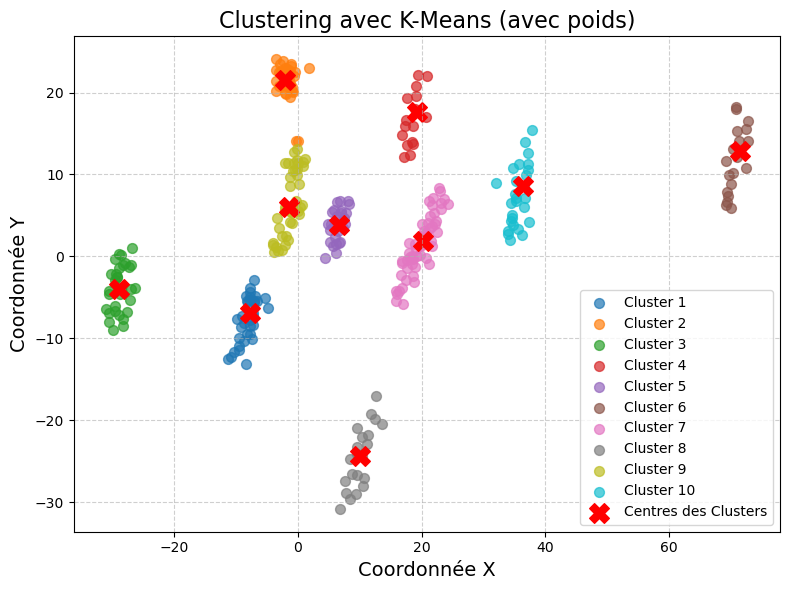

In [49]:
print("Méthode 2: produit des des de déviations")
apply_kmeans_with_weights_and_plot(float_points, prod_of_max, n_clusters=n_clusters)

Méthode 3: Maximum des maximums de deviations
Centres trouvés par K-Means :
[[ -8.11872925  -7.71176923]
 [ 19.78563028   1.39277961]
 [ -0.56935159  11.22448228]
 [-28.84040492  -3.88978946]
 [ 70.61751405  11.71073659]
 [ -1.88859264  21.7380315 ]
 [ 35.5577727    7.39148011]
 [ 10.01468987 -24.51609316]
 [ 18.4920373   16.73227565]
 [  0.41562947   3.59016488]]

Inertie (somme des distances intra-cluster) : 6896472202787.727
Score de silhouette : 0.6778432955290938

Temps d'exécution de K-Means : 0.0082 secondes


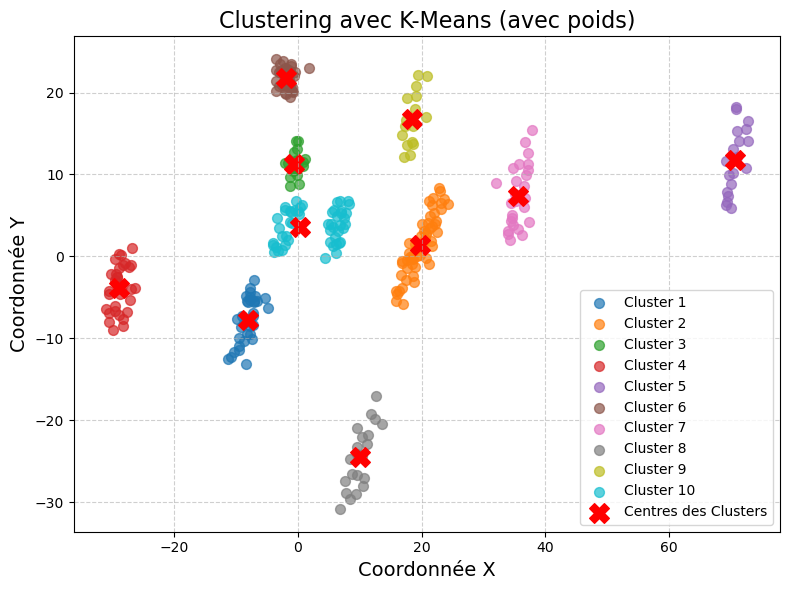

In [50]:
print("Méthode 3: Maximum des maximums de deviations")
apply_kmeans_with_weights_and_plot(float_points, max_of_max, n_clusters=n_clusters)